In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy.io.netcdf as sp
import netCDF4 as nc
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


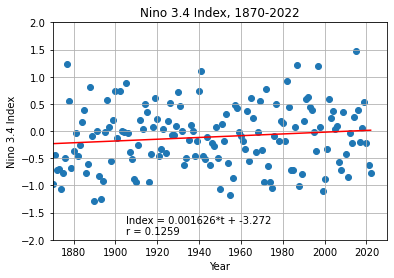

In [ ]:
# This script creates a graph of Nino 3.4 index data.

# Open the dataset file, separating by whitespaces. Skip first row, which does not have data.
# Set column 0 (which stores years) as the index column.
f = pd.read_csv('https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data',
                sep='\s+', skiprows=1, index_col=0, header=None)

# Get a subset of the dataset that ignores the last 7 rows that have non-data information.
# Then convert the data to numbers and mark missing entries.
data = f.iloc[0:-7]
data = data.apply(pd.to_numeric)
data.index = pd.to_numeric(data.index)
data = data.replace(-99.99, np.NaN)

# Create a column that stores the mean value for each year.
data['mean'] = data.mean(axis=1)

# Get the slope, y-intercept, and correlation coefficient for the best-fit line through the means each year.
m, b = np.polyfit(data.index, data['mean'], 1)
r = np.corrcoef(data.index, data['mean'])[0,1]

# Create a scatter plot of the means each year and overlay the best-fit line.
plt.scatter(data.index, data['mean'])
plt.plot(data.index, m * data.index + b, color='red')

# Adjust the scales of the axes and add text for linear regression
plt.axis([1870, 2030, -2, 2])
plt.text(1905, -1.9, 'Index = ' + f'{m:.4g}' + '*t + ' + f'{b:.4g}' + '\nr = ' + f'{r:.4g}')

# Add a graph title, axis labels, and a grid to the graph.
plt.title('Nino 3.4 Index, 1870-2022')
plt.xlabel('Year')
plt.ylabel('Nino 3.4 Index')
plt.grid()

# Save a PNG image of the graph
plt.savefig('/content/drive/My Drive/Research Project for CSATS/Nino-Year_Graph.png', bbox_inches='tight', dpi=200)